**EDGS COLAB:** https://colab.research.google.com/github/CompVis/EDGS/blob/main/notebooks/fit_model_to_scene_full.ipynb#scrollTo=5b039ea9-e9ea-41a7-b487-cc799a3ebf85

In [1]:
# Clone repo and initialize submodules
!git clone https://github.com/Parskatt/RoMa.git
!git clone https://github.com/camenduru/simple-knn.git
!git clone https://github.com/CompVis/EDGS.git --recursive
!git clone https://github.com/graphdeco-inria/gaussian-splatting.git
!git clone https://github.com/graphdeco-inria/diff-gaussian-rasterization.git

Cloning into 'RoMa'...
remote: Enumerating objects: 715, done.
remote: Counting objects: 100% (389/389), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 715 (delta 310), reused 271 (delta 271), pack-reused 326 (from 1)
Receiving objects: 100% (715/715), 14.67 MiB | 46.22 MiB/s, done.
Resolving deltas: 100% (462/462), done.
Cloning into 'simple-knn'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 61 (delta 26), reused 23 (delta 17), pack-reused 18 (from 1)
Receiving objects: 100% (61/61), 13.69 KiB | 3.42 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Cloning into 'EDGS'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 129 (delta 13), reused 5 (delta 5), pack-reused 90 (from 1)
Receiving objects: 100% (129/129), 373.53 MiB | 29.28 MiB/s, done.
Resolving delt

In [2]:
import sys, os

if 'scene' in sys.modules:
    del sys.modules['scene']  # Remove any existing 'scene' from sys.modules to avoid cached imports

sys.path.insert(0, "/content/EDGS")
sys.path.insert(0, "/content/RoMa")
sys.path.insert(0, "/content/simple-knn")
sys.path.insert(0, "/content/gaussian-splatting")
sys.path.insert(0, "/content/diff-gaussian-rasterization")

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [5]:
import os
print(os.getcwd())

/content


In [6]:
%cd /content/diff-gaussian-rasterization

/content/diff-gaussian-rasterization


In [7]:
# Make sure third_party folder exists
!mkdir -p third_party

# Get GLM from official repo
!git clone https://github.com/g-truc/glm.git third_party/glm

Cloning into 'third_party/glm'...
remote: Enumerating objects: 59935, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 59935 (delta 170), reused 129 (delta 129), pack-reused 59718 (from 2)
Receiving objects: 100% (59935/59935), 71.37 MiB | 25.95 MiB/s, done.
Resolving deltas: 100% (45405/45405), done.


In [9]:
!pip install -e .

Obtaining file:///content/diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Attempting uninstall: diff_gaussian_rasterization
    Found existing installation: diff_gaussian_rasterization 0.0.0
    Uninstalling diff_gaussian_rasterization-0.0.0:
      Successfully uninstalled diff_gaussian_rasterization-0.0.0
  Running setup.py develop for diff_gaussian_rasterization


In [10]:
%cd /content

/content


**Testig the Running of Gaussian Rasterization Installation**

In [11]:
import torch
from diff_gaussian_rasterization import GaussianRasterizer, GaussianRasterizationSettings

In [12]:
# Example: make dummy rasterization settings
settings = GaussianRasterizationSettings(
    image_height=512,
    image_width=512,
    tanfovx=1.0,
    tanfovy=1.0,
    bg=torch.zeros(3, device="cuda"),
    scale_modifier=1.0,
    viewmatrix=torch.eye(4, device="cuda"),
    projmatrix=torch.eye(4, device="cuda"),
    sh_degree=0,
    campos=torch.zeros(3, device="cuda"),
    prefiltered=False,
    debug=False
)

rasterizer = GaussianRasterizer(settings)
print("GaussianRasterizer ready!")

GaussianRasterizer ready!


**Testing Close**

In [ ]:
!pip install wandb hydra-core tqdm torchmetrics lpips matplotlib rich plyfile

**Install ROMA**

In [14]:
%cd /content/RoMa

/content/RoMa


In [15]:
!pip install -e .

Obtaining file:///content/RoMa
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 53.7 MB/s eta 0:00:00
  Running setup.py develop for romatch


In [16]:
%cd ..

/content


In [17]:
import os
print(os.getcwd())

/content


**Install Other Dependencies**

In [18]:
!pip install pycolmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 63.5 MB/s eta 0:00:00


In [19]:
!pip install wandb hydra-core tqdm torchmetrics lpips matplotlib rich plyfile imageio imageio-ffmpeg

In [ ]:
!pip install gradio

In [ ]:
!pip install plotly scikit-learn moviepy==2.1.1 ffmpeg

In [22]:
!pip install opencv-python

**Install Simple_KNN**

In [23]:
%cd /content/simple-knn

/content/simple-knn


In [24]:
!pip install -e .

Obtaining file:///content/simple-knn
  Preparing metadata (setup.py) ... done
  Running setup.py develop for simple_knn


In [25]:
%cd ..

/content


In [26]:
import os
print(os.getcwd())

/content


**Import Libraries & Configuration file**

In [27]:
# Check that scene/__init__.py exists here
assert os.path.exists("/content/gaussian-splatting/scene/__init__.py")
assert os.path.exists("/content/EDGS/configs/train.yaml")

In [28]:
%cd /content/EDGS

/content/EDGS


In [29]:
import os
print(os.getcwd())

/content/EDGS


In [30]:
import wandb
import hydra
import torch
import random
import shutil
import omegaconf
import numpy as np
%matplotlib inline
# %matplotlib ipympl
from omegaconf import OmegaConf
from matplotlib import pyplot as plt
from hydra import initialize, compose

In [31]:
from source.utils_aux import set_seed
from source.trainer import EDGSTrainer

In [32]:
with initialize(config_path="../content/EDGS/configs", version_base="1.1"):
    cfg = compose(config_name="train")

print(OmegaConf.to_yaml(cfg))

gs:
  _target_: source.networks.Warper3DGS
  verbose: true
  viewpoint_stack: null
  sh_degree: 3
  opt:
    iterations: 30000
    position_lr_init: 0.00016
    position_lr_final: 1.6e-06
    position_lr_delay_mult: 0.01
    position_lr_max_steps: 30000
    feature_lr: 0.0025
    opacity_lr: 0.025
    scaling_lr: 0.005
    rotation_lr: 0.001
    percent_dense: 0.01
    lambda_dssim: 0.2
    densification_interval: 100
    opacity_reset_interval: 30000
    densify_from_iter: 500
    densify_until_iter: 15000
    densify_grad_threshold: 0.0002
    random_background: false
    save_iterations:
    - 3000
    - 7000
    - 15000
    - 30000
    batch_size: 64
    exposure_lr_init: 0.01
    exposure_lr_final: 0.0001
    exposure_lr_delay_steps: 0
    exposure_lr_delay_mult: 0.0
    TRAIN_CAM_IDX_TO_LOG: 50
    TEST_CAM_IDX_TO_LOG: 10
  pipe:
    convert_SHs_python: false
    compute_cov3D_python: false
    debug: false
    antialiasing: false
  dataset:
    densify_until_iter: 15000
    sour

**Process Video**

In [34]:
PATH_TO_VIDEO = "/content/EDGS/assets/examples/video_fruits.mp4"
num_ref_views = 100 # how many frames you want to extract from video and colmap
num_corrs = 10000   # number of feature correspondences

if True:
    # Full pipeline helpers
    from gradio_demo import preprocess_input
    from source.utils_preprocess import read_video_frames, preprocess_frames, select_optimal_frames, save_frames_to_scene_dir, run_colmap_on_scene
    from source.visualization import generate_circular_camera_path, save_numpy_frames_as_mp4, generate_fully_smooth_cameras_with_tsp, put_text_on_image
    # Change to your path
    images, scene_dir = preprocess_input(PATH_TO_VIDEO, num_ref_views, num_corrs)
    shutil.copytree(scene_dir, '/content/EDGS/assets/video_colmaped/scene',  dirs_exist_ok=True)

Downloading: "https://github.com/Parskatt/storage/releases/download/roma/roma_indoor.pth" to /root/.cache/torch/hub/checkpoints/roma_indoor.pth
100%|██████████| 425M/425M [00:12<00:00, 36.3MB/s]
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitl14/dinov2_vitl14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitl14_pretrain.pth
100%|██████████| 1.13G/1.13G [00:05<00:00, 211MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Using coarse resolution (560, 560), and upsample res (864, 864)


Scoring frames: 100%|██████████| 417/417 [00:04<00:00, 91.84it/s]


Saved 100 frames to /tmp/tmphjtdzc5f/scene/images
Running COLMAP pipeline on all images inside /tmp/tmphjtdzc5f/scene
Finished feature extraction in 40.44s.
Finished feature matching in 157.57s.
Finished incremental mapping in 341.98s.
Total pipeline time: 342.02s.


In [ ]:
import os

scene_path = "/content/EDGS/assets/video_colmaped/scene"  # or whatever you set in cfg
for root, dirs, files in os.walk(scene_path):
    level = root.replace(scene_path, "").count(os.sep)
    indent = " " * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

**Update Config File With your own settings**

In [36]:
cfg.wandb.name="EDGS.demo.scene"
cfg.wandb.mode="disabled" # "online"
cfg.gs.dataset.model_path="./scene_edgsed/"  # "change this to your path to the processed scene"
#cfg.gs.dataset.source_path="../assets/scene_colmaped/" # "change this to your path"

cfg.gs.dataset.source_path="./assets/video_colmaped/scene"  # < --- For Video


cfg.gs.dataset.images="images"
cfg.gs.opt.TEST_CAM_IDX_TO_LOG=12
cfg.train.gs_epochs=30000
cfg.gs.opt.opacity_reset_interval=1_000_000
cfg.train.no_densify=False
cfg.init_wC.matches_per_ref=15_000
cfg.init_wC.nns_per_ref=3
cfg.init_wC.num_refs=180
cfg.init_wC.roma_model="outdoors"

# SH & render
cfg.gs.sh_degree = 3
cfg.gs.opt.batch_size = 2048   # or 1024/2048/4096 if GPU allows
cfg.init_wC.add_SfM_init = True
cfg.gs.opt.densify_from_iter = 1000
cfg.gs.opt.densify_until_iter = 20000
cfg.gs.opt.densification_interval = 800
cfg.gs.dataset.white_background = False
cfg.gs.pipe.convert_SHs_python = True
cfg.gs.pipe.compute_cov3D_python = True

# **Initialize Model and Logger**

In [37]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khanzadakhan9294 (khanzadakhan9294-fiverivers-technologies) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [40]:
!mkdir -p /root/.cache/torch/hub/checkpoints
!cp /content/drive/MyDrive/roma_outdoor.pth /root/.cache/torch/hub/checkpoints/

In [41]:
_ = wandb.init(entity=cfg.wandb.entity,
                   project=cfg.wandb.project,
                   config=omegaconf.OmegaConf.to_container(cfg, resolve=True, throw_on_missing=True),
                   name = cfg.wandb.name,
                   mode = cfg.wandb.mode)
omegaconf.OmegaConf.resolve(cfg)
set_seed(cfg.seed)
# Init output folder
print("Output folder: {}".format(cfg.gs.dataset.model_path))
os.makedirs(cfg.gs.dataset.model_path, exist_ok=True)
# Init gs model
gs = hydra.utils.instantiate(cfg.gs)
trainer = EDGSTrainer(GS=gs,
                      training_config=cfg.gs.opt,
                      device=cfg.device)

Output folder: ./scene_edgsed/
Reading camera 100/100
Converting point3d.bin to .ply, will happen only the first time you open the scene.
Loading Training Cameras
Loading Test Cameras
Number of points at initialisation :  10309
Preparing train and test sets split...
Found no test_cameras for resolution 1.0. Move every 8th camera out ouf total 100 train cameras to the test set now
Done. Now train and test sets contain each 87 and 13 cameras respectively.
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 82.5MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth


/usr/local/lib/python3.11/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st

**Init With Matchings**

In [42]:
trainer.timer.start()
trainer.init_with_corr(cfg.init_wC)
trainer.timer.pause()

N_splats_at_init: 10309


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Using coarse resolution (560, 560), and upsample res (864, 864)
Once run full roma_model.match warp.shape: torch.Size([560, 560, 4])
Once run full roma_model.match certainty_warp.shape: torch.Size([560, 560])


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

100%|████████

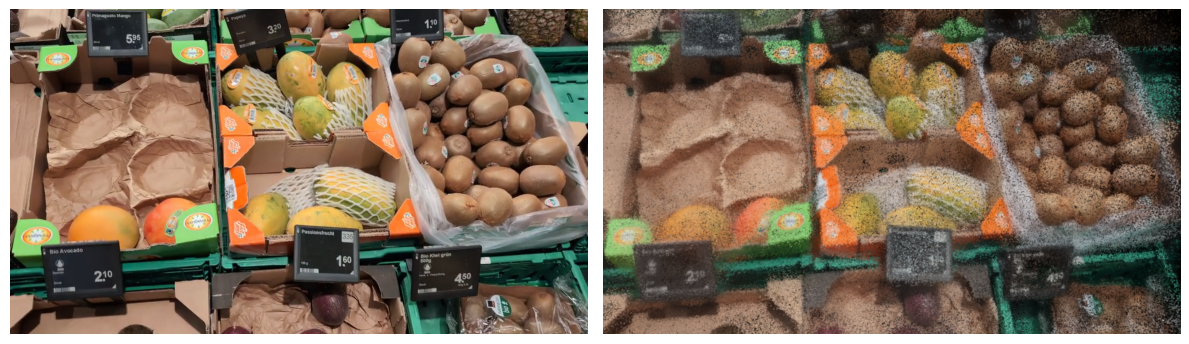

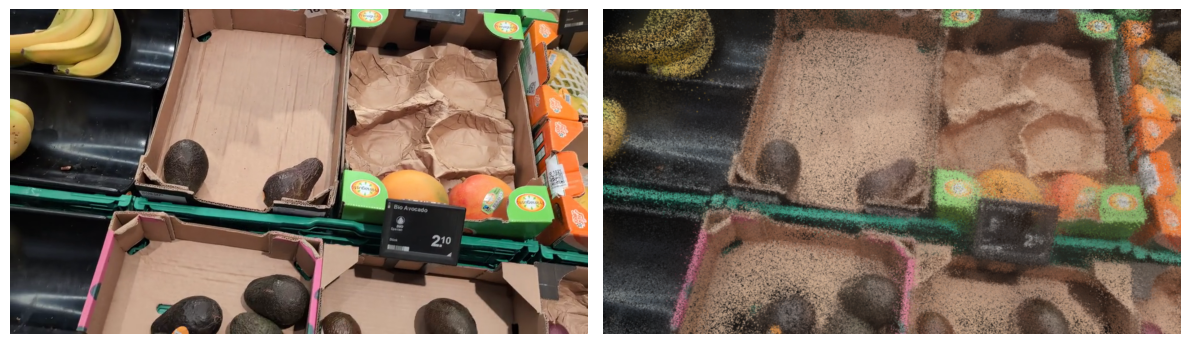

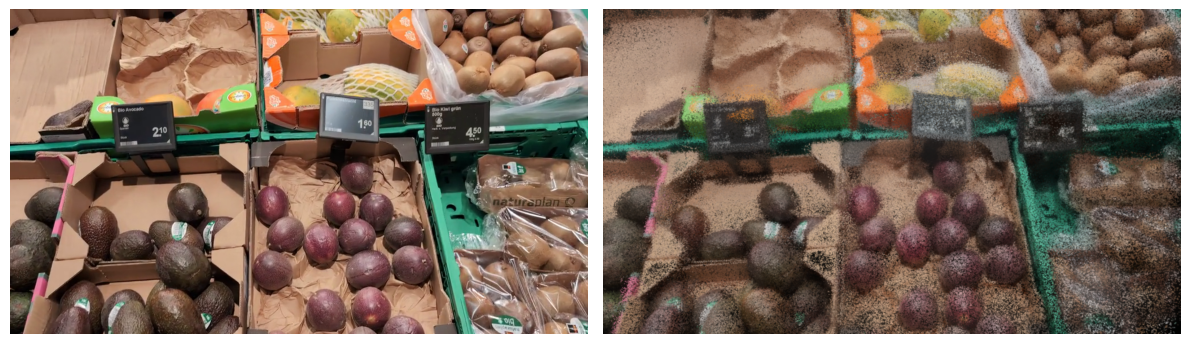

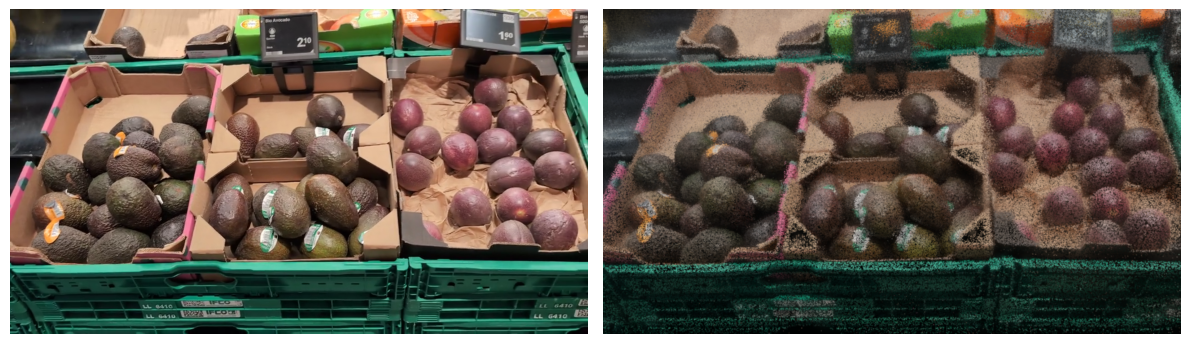

In [43]:
with torch.no_grad():
    viewpoint_stack = trainer.GS.scene.getTrainCameras()
    viewpoint_cams_to_viz = random.sample(trainer.GS.scene.getTrainCameras(), 4)
    for viewpoint_cam in viewpoint_cams_to_viz:
        render_pkg = trainer.GS(viewpoint_cam)
        image = render_pkg["render"]

        image_np = image.clone().detach().cpu().numpy().transpose(1, 2, 0)
        image_gt_np = viewpoint_cam.original_image.clone().detach().cpu().numpy().transpose(1, 2, 0)

        # Clip values to be in the range [0, 1]
        image_np = np.clip(image_np*255, 0, 255).astype(np.uint8)
        image_gt_np = np.clip(image_gt_np*255, 0, 255).astype(np.uint8)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        ax[0].imshow(image_gt_np)
        ax[0].axis("off")
        ax[1].imshow(image_np)
        ax[1].axis("off")
        plt.tight_layout()
        plt.show()

# **Optimize The Scene**

Optimize first briefly for 5k steps and visualize results. We also disable saving of pretrained models. Train function can be changed for any other method

In [44]:
trainer.saving_iterations = []
cfg.train.gs_epochs=5000
trainer.train(cfg.train)

Train 3DGS for 5000 iterations

Output()

/usr/local/lib/python3.11/dist-packages/tqdm/rich.py:146: TqdmExperimentalWarning: rich is experimental/alpha
  return tqdm_rich(range(*args), **kwargs)


[ITER 500], #1315309 gaussians, Evaluating test: L1=0.033816,  PSNR=25.686107, SSIM=0.876619, LPIPS_splat=0.165454 

[ITER 500], #1315309 gaussians, Evaluating train: L1=0.031832,  PSNR=26.286079, SSIM=0.891521, LPIPS_splat=0.151371 

[ITER 1000], #1315309 gaussians, Evaluating test: L1=0.029980,  PSNR=26.690002, SSIM=0.895715, LPIPS_splat=0.138020 

[ITER 1000], #1315309 gaussians, Evaluating train: L1=0.027617,  PSNR=27.434058, SSIM=0.912048, LPIPS_splat=0.121504 

[ITER 1500], #1315309 gaussians, Evaluating test: L1=0.027418,  PSNR=27.336527, SSIM=0.905563, LPIPS_splat=0.124096 

[ITER 1500], #1315309 gaussians, Evaluating train: L1=0.025220,  PSNR=28.078274, SSIM=0.920219, LPIPS_splat=0.108817 

[ITER 2000], #1374710 gaussians, Evaluating test: L1=0.023075,  PSNR=28.926712, SSIM=0.930014, LPIPS_splat=0.071128 

[ITER 2000], #1374710 gaussians, Evaluating train: L1=0.021032,  PSNR=29.758829, SSIM=0.940931, LPIPS_splat=0.063271 

[ITER 3000], #1387682 gaussians, Evaluating train: L1=0.016356,  PSNR=31.687024, SSIM=0.953854, LPIPS_splat=0.048493 

[ITER 3228], #1394192 gaussians, Evaluating test: L1=0.018920,  PSNR=30.504843, SSIM=0.941031, LPIPS_splat=0.057456 

[ITER 3228], #1394192 gaussians, Evaluating train: L1=0.016644,  PSNR=31.584237, SSIM=0.953528, LPIPS_splat=0.049496 

[ITER 4228], #1397926 gaussians, Evaluating test: L1=0.016735,  PSNR=31.555642, SSIM=0.949395, LPIPS_splat=0.050180 

[ITER 4228], #1397926 gaussians, Evaluating train: L1=0.014186,  PSNR=32.871015, SSIM=0.961990, LPIPS_splat=0.041711 

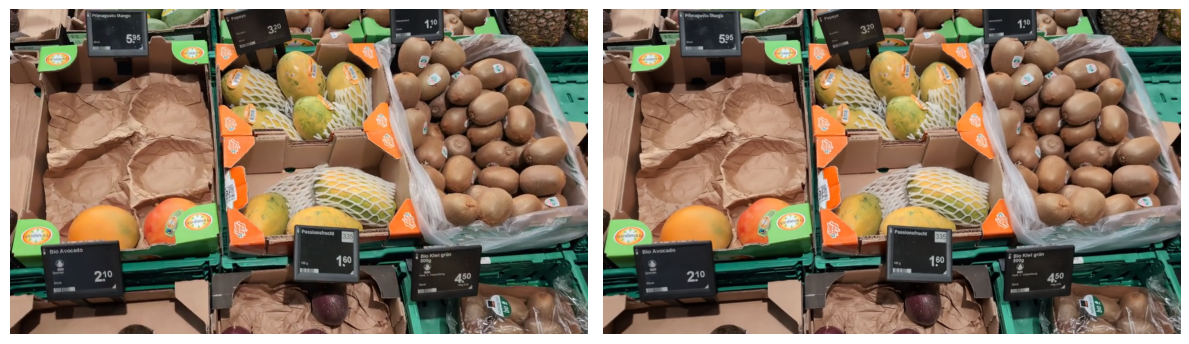

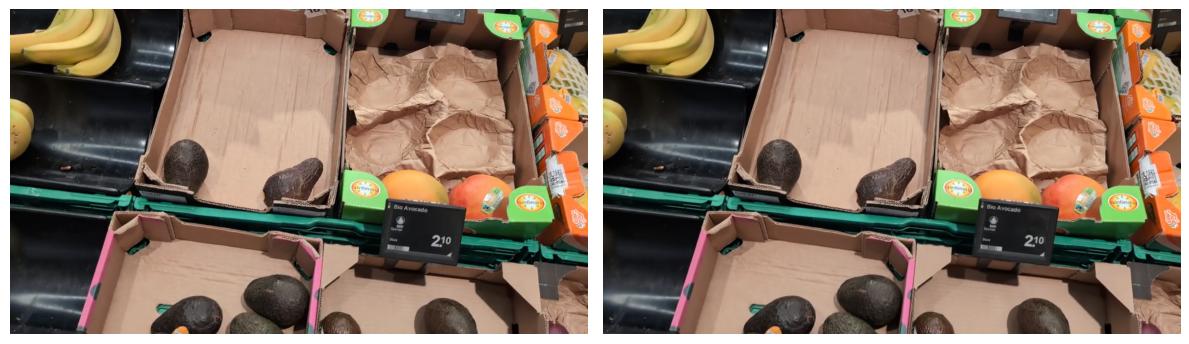

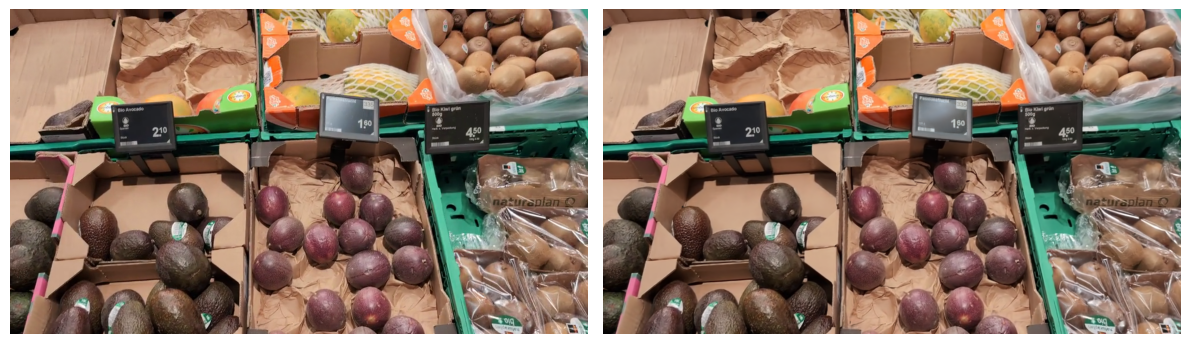

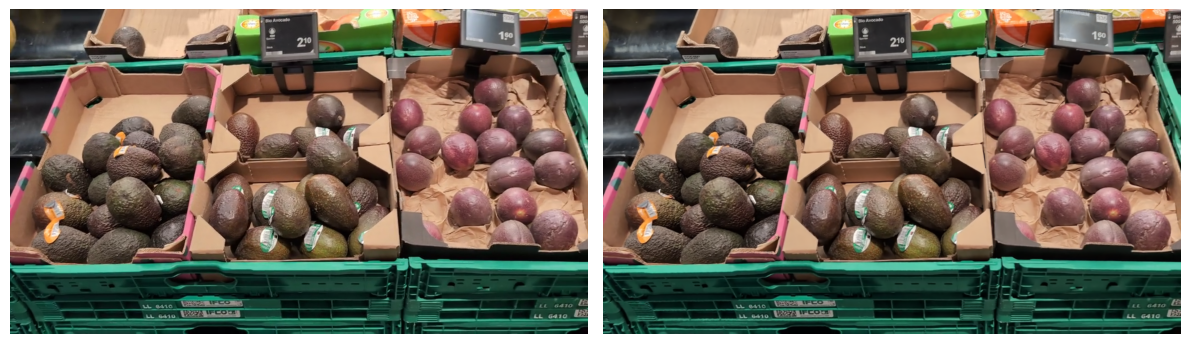

In [45]:
with torch.no_grad():
    for viewpoint_cam in viewpoint_cams_to_viz:
        render_pkg = trainer.GS(viewpoint_cam)
        image = render_pkg["render"]

        image_np = image.clone().detach().cpu().numpy().transpose(1, 2, 0)
        image_gt_np = viewpoint_cam.original_image.clone().detach().cpu().numpy().transpose(1, 2, 0)

        # Clip values to be in the range [0, 1]
        image_np = np.clip(image_np*255, 0, 255).astype(np.uint8)
        image_gt_np = np.clip(image_gt_np*255, 0, 255).astype(np.uint8)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        ax[0].imshow(image_gt_np)
        ax[0].axis("off")
        ax[1].imshow(image_np)
        ax[1].axis("off")
        plt.tight_layout()
        plt.show()

In [46]:
with torch.no_grad():
    trainer.save_model()


[ITER 5000] Saving Gaussians

[ITER 5000] Saving Checkpoint


**Continue training until we reach total 30K training steps**

In [ ]:
trainer.saving_iterations = []
cfg.train.gs_epochs=15_000
trainer.train(cfg.train)

In [ ]:
with torch.no_grad():
    for viewpoint_cam in viewpoint_cams_to_viz:
        render_pkg = trainer.GS(viewpoint_cam)
        image = render_pkg["render"]

        image_np = image.clone().detach().cpu().numpy().transpose(1, 2, 0)
        image_gt_np = viewpoint_cam.original_image.clone().detach().cpu().numpy().transpose(1, 2, 0)

        # Clip values to be in the range [0, 1]
        image_np = np.clip(image_np*255, 0, 255).astype(np.uint8)
        image_gt_np = np.clip(image_gt_np*255, 0, 255).astype(np.uint8)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        ax[0].imshow(image_gt_np)
        ax[0].axis("off")
        ax[1].imshow(image_np)
        ax[1].axis("off")
        plt.tight_layout()
        plt.show()

In [ ]:
with torch.no_grad():
    trainer.save_model()

In [ ]:
import shutil
import os

folder_path = "/content/EDGS/assets/video_colmaped"

# Check if the folder exists before deleting
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder '/content/EDGS/assets/video_colmaped' deleted successfully.


In [58]:
import shutil

folder_path = "/content/EDGS/scene_edgsed/point_cloud"
zip_path = "/content/gs_PointCloud_1.zip"

# Create a zip file
shutil.make_archive("/content/gs_PointCloud_1", 'zip', folder_path)

'/content/gs_PointCloud_1.zip'